# Texto en Tablas

Por **Daniela Opitz & Eduardo Graells**. <dopitz@udd.cl>.

Actualizado: **31 de mayo de 2024**.

En este notebook exploraremos algunas visualizaciones donde el texto es protagonista a través del dataset [guaguas](https://github.com/rivaquiroga/guaguas) preparado por [Riva Quiroga](https://twitter.com/rivaquiroga). Algunos de los análisis están inspirados en los ejemplos que ella incluyó en el repositorio de guaguas.


## Google Colab

Para ejecutar este notebook en Colab, primero ejecuten la siguiente celda. Luego el notebook se reiniciará.

In [ ]:
try:
    import google.colab
    !curl -L -O https://github.com/daniopitz/visualizacion/raw/main/clases_practicas/data/clases_practicas/data/1920-2020.csv
    !curl -L -O https://github.com/daniopitz/visualizacion/raw/main/clases_practicas/miniaves.py
except:
    pass


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  242k    0  242k    0     0   344k      0 --:--:-- --:--:-- --:--:--  344k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 29450  100 29450    0     0  50643      0 --:--:-- --:--:-- --:--:--  718k


In [ ]:
try:
    import google.colab
    !curl -L -o Fira_Sans_Extra_Condensed.zip 'https://www.dropbox.com/s/82nuhtpybfpjeq9/Fira_Sans_Extra_Condensed.zip?dl=1'
    !unzip -o Fira_Sans_Extra_Condensed.zip
    import matplotlib as mpl
    mpl.font_manager.fontManager.addfont('Fira_Sans_Extra_Condensed/FiraSansExtraCondensed-Regular.ttf')
    #mpl.rc('font', family='Fira Sans Extra Condensed')
except:
    pass

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100    74    0    74    0     0    279      0 --:--:-- --:--:-- --:--:--   280
100   320  100   320    0     0    532      0 --:--:-- --:--:-- --:--:--   532
100 3733k  100 3733k    0     0  2915k      0  0:00:01  0:00:01 --:--:-- 60.7M
Archive:  Fira_Sans_Extra_Condensed.zip
  inflating: __MACOSX/._Fira_Sans_Extra_Condensed  
  inflating: Fira_Sans_Extra_Condensed/FiraSansExtraCondensed-MediumItalic.ttf  
  inflating: __MACOSX/Fira_Sans_Extra_Condensed/._FiraSansExtraCondensed-MediumItalic.ttf  
  inflating: Fira_Sans_Extra_Condensed/FiraSansExtraCondensed-Italic.ttf  
  inflating: __MACOSX/Fira_Sans_Extra_Condensed/._FiraSansExtraCondensed-Italic.ttf  
  inflating: Fira_Sans_Extra_Condensed/FiraSansExtraCondensed-BlackItalic.ttf  
  inflating: __MACOSX/Fira_Sans_Extra_Condensed/._FiraSansExtraCondensed-BlackItalic.ttf  
  inflat

Una vez que se ha reiniciado puedes ejecutar el resto de las celdas.

## Preámbulo

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

import matplotlib as mpl

import seaborn as sns
sns.set_style('whitegrid')

# esto configura la calidad de la imagen. dependerá de tu resolución. el valor por omisión es 80
mpl.rcParams["figure.dpi"] = 150
# esto depende de las fuentes que tengas instaladas en el sistema.
mpl.rcParams["font.family"] = "Fira Sans Extra Condensed"


#Carga y Preparación de Datos

In [ ]:
guaguas = pd.read_csv('1920-2020.csv', sep=';')
guaguas.head()

,anio,nombre,sexo,n
0,1920,Aaron,M,1
1,1920,Abdolina,F,1
2,1920,Abdon,M,3
3,1920,Abel,M,11
4,1920,Abelardo,M,10


Nuestro objetivo es agrupar los datos por la columna nombre, sumar los valores de n para cada grupo, y luego ordenar estos resultados de manera descendente para identificar cuáles grupos de nombres tienen los valores más altos.

In [ ]:
total_n = guaguas.groupby('nombre')['n'].sum().sort_values(ascending=False)
total_n

nombre
Maria      973128
Jose       596119
Juan       580654
Luis       505375
Carlos     293381
            ...  
Idolive         1
Idolito         1
Idolida         1
Idolfio         1
Zysli           1
Name: n, Length: 186295, dtype: int64

Filtramos para mostrar sólo aquellos grupos cuya suma de n es mayor a 100.

In [ ]:
total_n[total_n > 100]

nombre
Maria         973128
Jose          596119
Juan          580654
Luis          505375
Carlos        293381
               ...  
Camilla          101
Temistocle       101
Imelda           101
Nira             101
Fulvio           101
Name: n, Length: 4298, dtype: int64

Ahora transformamos la serie resultante en una tabla que sea fácil de analizar.

In [ ]:
top_100=total_n[total_n > 100].index.tolist()
top_100

['Maria',
 'Jose',
 'Juan',
 'Luis',
 'Carlos',
 'Jorge',
 'Manuel',
 'Ana',
 'Rosa',
 'Francisco',
 'Victor',
 'Cristian',
 'Pedro',
 'Hector',
 'Sergio',
 'Sebastian',
 'Benjamin',
 'Miguel',
 'Matias',
 'Felipe',
 'Rodrigo',
 'Eduardo',
 'Patricia',
 'Claudia',
 'Carolina',
 'Camila',
 'Diego',
 'Patricio',
 'Nicolas',
 'Daniel',
 'Mario',
 'Catalina',
 'Claudio',
 'Pablo',
 'Javiera',
 'Ricardo',
 'Sofia',
 'Fernando',
 'Francisca',
 'Juana',
 'Daniela',
 'Constanza',
 'Oscar',
 'Valentina',
 'Jaime',
 'Alejandro',
 'Vicente',
 'Margarita',
 'Carmen',
 'Roberto',
 'Raul',
 'Javier',
 'Mauricio',
 'Martin',
 'Guillermo',
 'Marcelo',
 'Marcela',
 'Marta',
 'Gabriel',
 'Joaquin',
 'Sandra',
 'David',
 'Veronica',
 'Fernanda',
 'Julio',
 'Agustin',
 'Ignacio',
 'Cristobal',
 'Elizabeth',
 'Cecilia',
 'Tomas',
 'Marco',
 'Monica',
 'Alejandra',
 'Martina',
 'Hugo',
 'Isidora',
 'Teresa',
 'Andres',
 'Antonia',
 'Paola',
 'Cesar',
 'Emilia',
 'Silvia',
 'Maximiliano',
 'Gloria',
 'Isabel

In [ ]:
# Filtrar las filas donde el nombre aparece más de 100 veces en el dataset 'guaguas'
guaguas_filtradas = guaguas[guaguas["nombre"].isin(top_100)]

# Agrupar los datos por 'anio' y 'nombre', y sumar la columna 'n' para cada grupo
grupo_anual = guaguas_filtradas.groupby(["anio", "nombre"])["n"].sum()

# Transformar la serie en una tabla, rellenando los valores faltantes con 0
tabla_anual = grupo_anual.unstack(fill_value=0)

# Mostrar la tabla resultante
tabla_anual


nombre,Aaron,Abby,Abdias,Abdiel,Abdon,Abel,Abelardo,Abelina,Abelino,Abercio,...,Zocimo,Zoe,Zoila,Zoilo,Zoraida,Zorka,Zorobabel,Zudelia,Zulema,Zunilda
anio,,,,,,,,,,,,,,,,,,,,,
1920,1,0,0,0,3,11,10,2,3,0,...,3,1,31,2,6,1,2,1,17,19
1921,0,0,1,1,3,44,18,9,5,1,...,1,0,90,3,4,0,0,1,59,42
1922,0,0,1,0,12,45,28,8,7,2,...,1,1,77,6,7,1,1,2,62,37
1923,0,0,1,0,8,34,27,11,4,2,...,2,0,84,5,11,0,1,1,68,53
1924,2,0,0,0,7,40,29,6,11,1,...,1,0,94,5,2,0,2,2,61,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016,463,36,12,45,1,28,0,0,0,0,...,0,116,0,0,0,0,0,0,1,0
2017,421,52,16,58,3,31,0,0,0,0,...,0,107,0,0,0,0,0,0,3,0
2018,382,48,8,64,2,36,0,0,0,0,...,0,108,1,0,0,0,0,0,3,1


Como la población cambia cada año vamos a  normalizar las filas de la tabla tabla_anual y luego visualizar las columnas correspondientes a "Salvador" y "Augusto" para analizar su distribución de frecuencias relativa.

In [ ]:
def normalize_rows(df):
    return df.div(df.sum(axis=1), axis=0)


In [ ]:
tabla_anual.pipe(normalize_rows)

nombre,Aaron,Abby,Abdias,Abdiel,Abdon,Abel,Abelardo,Abelina,Abelino,Abercio,...,Zocimo,Zoe,Zoila,Zoilo,Zoraida,Zorka,Zorobabel,Zudelia,Zulema,Zunilda
anio,,,,,,,,,,,,,,,,,,,,,
1920,0.000051,0.000000,0.000000,0.000000,0.000153,0.000559,0.000509,0.000102,0.000153,0.000000,...,0.000153,0.000051,0.001577,0.000102,0.000305,0.000051,0.000102,0.000051,0.000865,0.000966
1921,0.000000,0.000000,0.000022,0.000022,0.000067,0.000987,0.000404,0.000202,0.000112,0.000022,...,0.000022,0.000000,0.002018,0.000067,0.000090,0.000000,0.000000,0.000022,0.001323,0.000942
1922,0.000000,0.000000,0.000021,0.000000,0.000256,0.000958,0.000596,0.000170,0.000149,0.000043,...,0.000021,0.000021,0.001640,0.000128,0.000149,0.000021,0.000021,0.000043,0.001320,0.000788
1923,0.000000,0.000000,0.000020,0.000000,0.000164,0.000695,0.000552,0.000225,0.000082,0.000041,...,0.000041,0.000000,0.001718,0.000102,0.000225,0.000000,0.000020,0.000020,0.001391,0.001084
1924,0.000037,0.000000,0.000000,0.000000,0.000131,0.000748,0.000542,0.000112,0.000206,0.000019,...,0.000019,0.000000,0.001758,0.000093,0.000037,0.000000,0.000037,0.000037,0.001141,0.001141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016,0.002085,0.000162,0.000054,0.000203,0.000005,0.000126,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000522,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000005,0.000000
2017,0.002034,0.000251,0.000077,0.000280,0.000014,0.000150,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000517,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000014,0.000000
2018,0.001852,0.000233,0.000039,0.000310,0.000010,0.000175,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000524,0.000005,0.000000,0.000000,0.000000,0.000000,0.000000,0.000015,0.000005


In [ ]:
tabla_anual_norm=tabla_anual.pipe(normalize_rows)
tabla_anual_norm

nombre,Aaron,Abby,Abdias,Abdiel,Abdon,Abel,Abelardo,Abelina,Abelino,Abercio,...,Zocimo,Zoe,Zoila,Zoilo,Zoraida,Zorka,Zorobabel,Zudelia,Zulema,Zunilda
anio,,,,,,,,,,,,,,,,,,,,,
1920,0.000051,0.000000,0.000000,0.000000,0.000153,0.000559,0.000509,0.000102,0.000153,0.000000,...,0.000153,0.000051,0.001577,0.000102,0.000305,0.000051,0.000102,0.000051,0.000865,0.000966
1921,0.000000,0.000000,0.000022,0.000022,0.000067,0.000987,0.000404,0.000202,0.000112,0.000022,...,0.000022,0.000000,0.002018,0.000067,0.000090,0.000000,0.000000,0.000022,0.001323,0.000942
1922,0.000000,0.000000,0.000021,0.000000,0.000256,0.000958,0.000596,0.000170,0.000149,0.000043,...,0.000021,0.000021,0.001640,0.000128,0.000149,0.000021,0.000021,0.000043,0.001320,0.000788
1923,0.000000,0.000000,0.000020,0.000000,0.000164,0.000695,0.000552,0.000225,0.000082,0.000041,...,0.000041,0.000000,0.001718,0.000102,0.000225,0.000000,0.000020,0.000020,0.001391,0.001084
1924,0.000037,0.000000,0.000000,0.000000,0.000131,0.000748,0.000542,0.000112,0.000206,0.000019,...,0.000019,0.000000,0.001758,0.000093,0.000037,0.000000,0.000037,0.000037,0.001141,0.001141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016,0.002085,0.000162,0.000054,0.000203,0.000005,0.000126,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000522,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000005,0.000000
2017,0.002034,0.000251,0.000077,0.000280,0.000014,0.000150,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000517,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000014,0.000000
2018,0.001852,0.000233,0.000039,0.000310,0.000010,0.000175,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000524,0.000005,0.000000,0.000000,0.000000,0.000000,0.000000,0.000015,0.000005


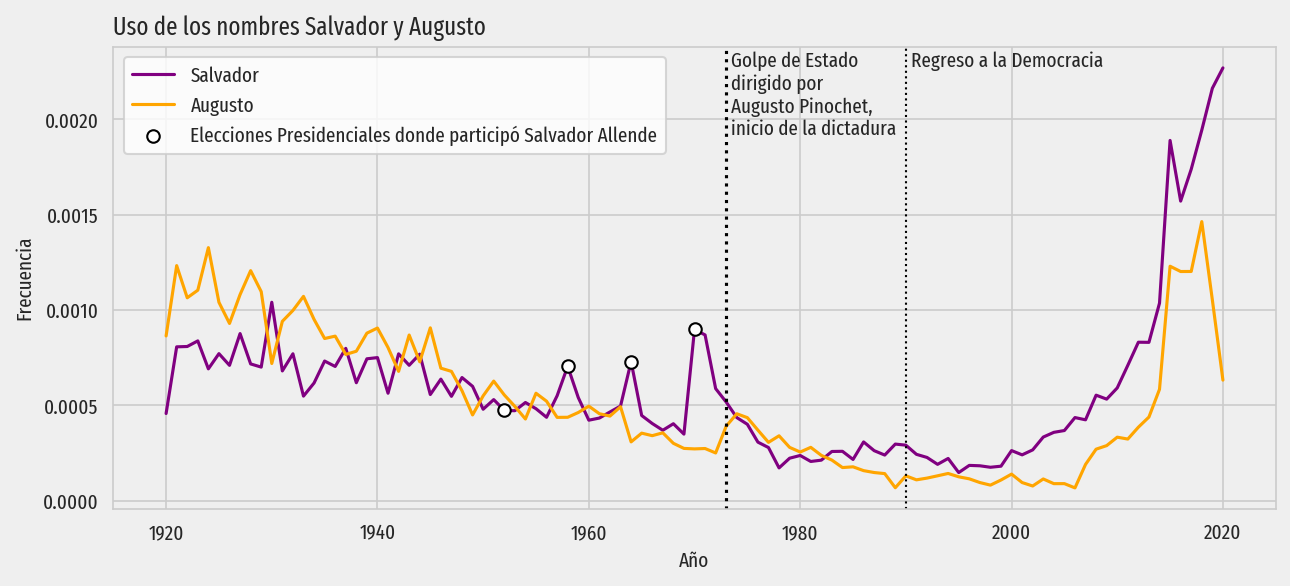

In [ ]:
# Filtrar los datos para los nombres "Salvador" y "Augusto"
nombres_a_comparar = ["Salvador", "Augusto"]
datos_filtrados = tabla_anual_norm[nombres_a_comparar]

# Crear el gráfico de líneas
fig, ax = plt.subplots(figsize=(10, 4))

# Establecer el color de fondo
fig.patch.set_facecolor('#efefef')
ax.set_facecolor('#efefef')

# Graficar los datos para "Salvador"
ax.plot(datos_filtrados.index, datos_filtrados["Salvador"], label="Salvador", color="purple")

# Graficar los datos para "Augusto"
ax.plot(datos_filtrados.index, datos_filtrados["Augusto"], label="Augusto", color="orange")

# Añadir una línea vertical en el año 1973
ax.axvline(x=1973, color='black', linestyle='dotted')

ax.annotate("Golpe de Estado\ndirigido por\nAugusto Pinochet,\ninicio de la dictadura",
    xy=(1973.5, 0.99),
    xycoords=("data", "axes fraction"),
    ha="left",
    va="top")

# Añadir una línea vertical en el año 1990
ax.axvline(1990, linestyle="dotted", linewidth=1, color="black")

ax.annotate("Regreso a la Democracia",
    xy=(1990.5, 0.99),
    xycoords=("data", "axes fraction"),
    ha="left",
    va="top")

# Añadir puntos de dispersión para las elecciones presidenciales en las que participó Salvador Allende
elecciones_allende = [1952, 1958, 1964, 1970]
ax.scatter(
    elecciones_allende,
    datos_filtrados.loc[elecciones_allende, "Salvador"],
    color="white",
    edgecolor="black",
    label="Elecciones Presidenciales donde participó Salvador Allende",
    zorder=5,
)


# Configurar etiquetas y título del gráfico
ax.set_xlabel("Año")
ax.set_ylabel("Frecuencia")
ax.set_title("Uso de los nombres Salvador y Augusto", loc="left")


# Añadir leyenda
ax.legend()



¿Cómo se ve si graficamos los totales?

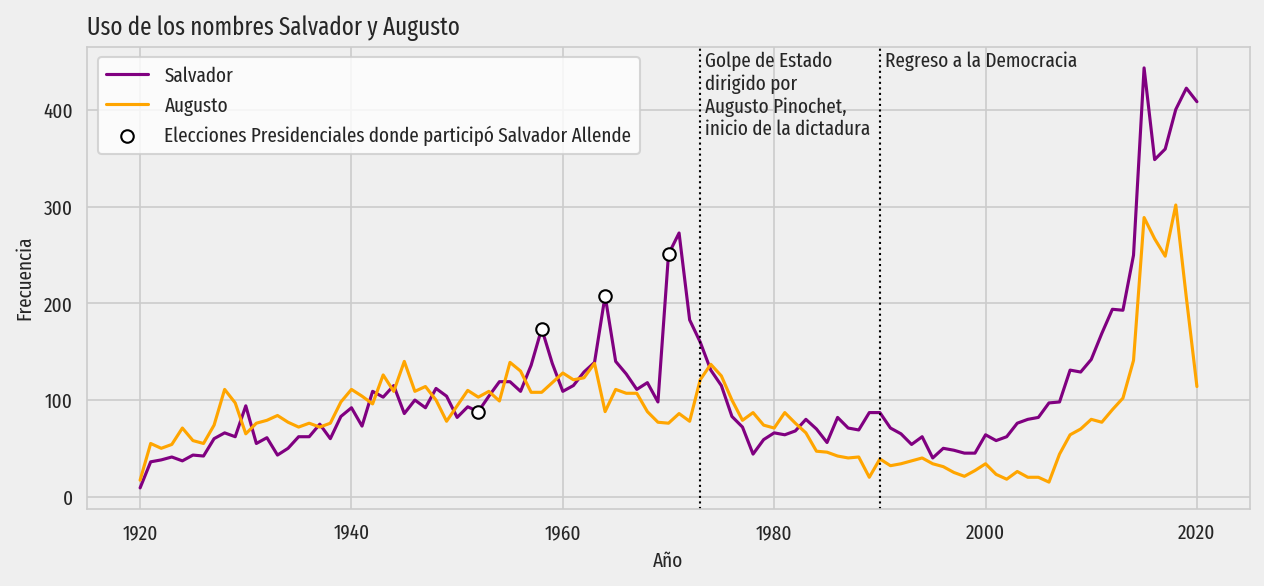

In [ ]:
# Filtrar los datos para los nombres "Salvador" y "Augusto"
nombres_a_comparar = ["Salvador", "Augusto"]
datos_filtrados = tabla_anual[nombres_a_comparar]

# Crear el gráfico de líneas
fig, ax = plt.subplots(figsize=(10, 4))

# Establecer el color de fondo
fig.patch.set_facecolor('#efefef')
ax.set_facecolor('#efefef')

# Graficar los datos para "Salvador"
ax.plot(datos_filtrados.index, datos_filtrados["Salvador"], label="Salvador", color="purple")

# Graficar los datos para "Augusto"
ax.plot(datos_filtrados.index, datos_filtrados["Augusto"], label="Augusto", color="orange")

# Añadir líneas verticales para eventos importantes
ax.axvline(1973, linestyle="dotted", linewidth=1, color="black")
ax.annotate(
    "Golpe de Estado\ndirigido por\nAugusto Pinochet,\ninicio de la dictadura",
    xy=(1973.5, 0.99),
    xycoords=("data", "axes fraction"),
    ha="left",
    va="top",
)

ax.axvline(1990, linestyle="dotted", linewidth=1, color="black")
ax.annotate(
    "Regreso a la Democracia",
    xy=(1990.5, 0.99),
    xycoords=("data", "axes fraction"),
    ha="left",
    va="top",
)

# Añadir puntos de dispersión para las elecciones presidenciales en las que participó Salvador Allende
elecciones_allende = [1952, 1958, 1964, 1970]
ax.scatter(
    elecciones_allende,
    tabla_anual.loc[elecciones_allende, "Salvador"],
    color="white",
    edgecolor="black",
    label="Elecciones Presidenciales donde participó Salvador Allende",
    zorder=5,
)

# Configurar etiquetas y título del gráfico
ax.set_xlabel("Año")
ax.set_ylabel("Frecuencia")
ax.set_title("Uso de los nombres Salvador y Augusto", loc="left")


# Añadir leyenda
ax.legend()


# Steam Graph o Gráfico de Flujo

Un streamgraph (o gráfico de flujo) es un tipo de gráfico utilizado para mostrar la evolución de datos multivariados a lo largo del tiempo. Se caracteriza por sus formas suaves y apiladas, que parecen fluir en el tiempo, de ahí el nombre "stream" (corriente o flujo). Cada categoría de datos se representa como una banda de color, y el ancho de cada banda en cualquier punto en el tiempo refleja la magnitud de esa categoría.

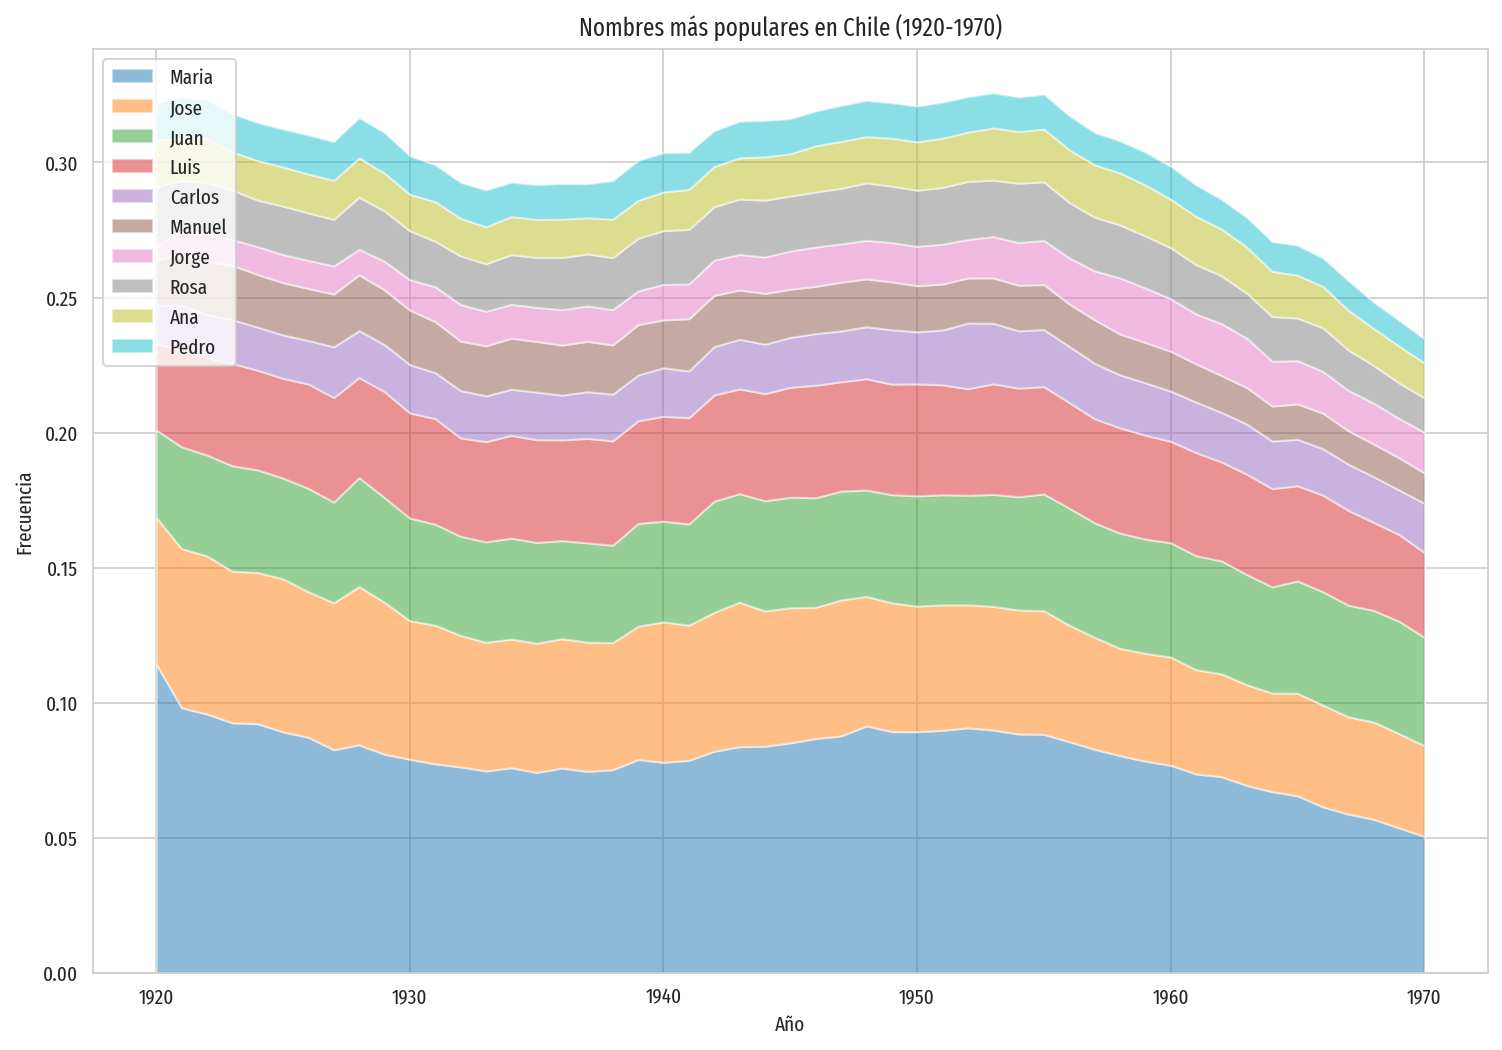

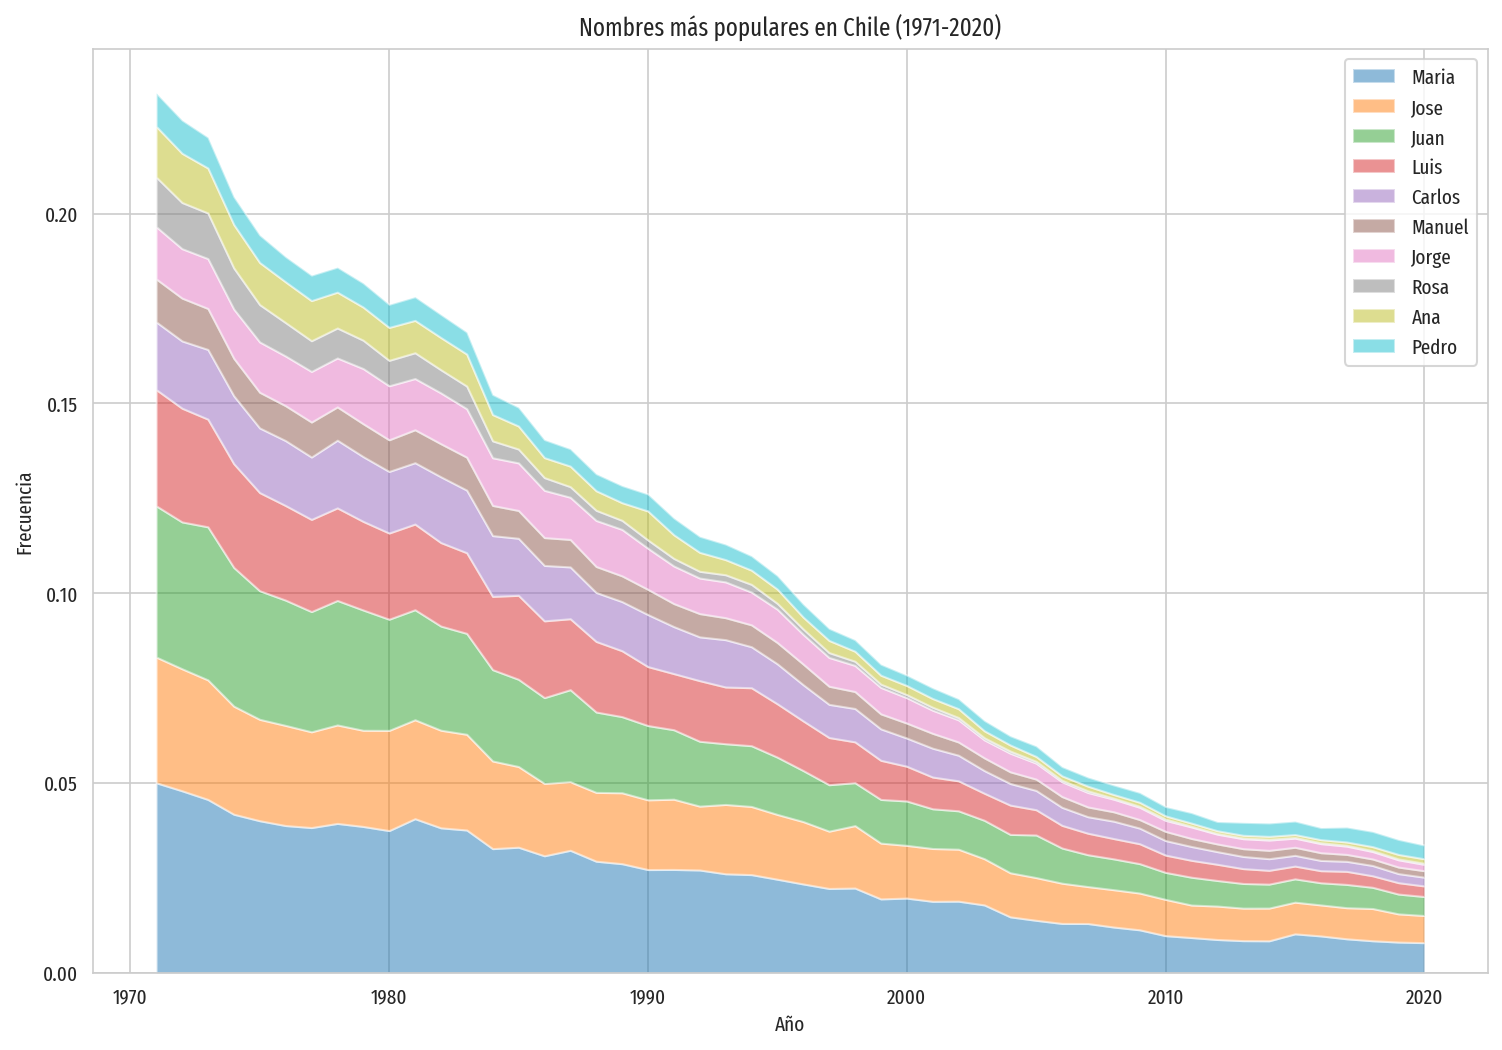

In [ ]:
# Obtener los 10 nombres más populares
nombres_mas_populares = tabla_anual_norm.sum(axis=0).sort_values(ascending=False).head(10).index
datos_populares = tabla_anual_norm[nombres_mas_populares]

# Dividir los datos en dos períodos
datos_1920_1970 = datos_populares.loc[1920:1970]
datos_1971_2020 = datos_populares.loc[1971:]

# Función para crear un gráfico de áreas apiladas
def crear_stackplot(datos, title, legend_loc):
    fig, ax = plt.subplots(figsize=(12, 8))
    ax.stackplot(datos.index, datos.T, labels=datos.columns, alpha=0.5)
    ax.set_xlabel("Año")
    ax.set_ylabel("Frecuencia")
    ax.set_title(title)
    ax.legend(loc=legend_loc)
    plt.show()

# Crear el gráfico para 1920-1970
crear_stackplot(datos_1920_1970, "Nombres más populares en Chile (1920-1970)", 'upper left')

# Crear el gráfico para 1971-2020
crear_stackplot(datos_1971_2020, "Nombres más populares en Chile (1971-2020)", 'upper right')


# Interactividad

In [ ]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# Suponiendo que ya tienes los datos en 'datos_populares', 'datos_1920_1970' y 'datos_1971_2020'

nombres_mas_populares = tabla_anual_norm.sum(axis=0).sort_values(ascending=False).head(10).index
datos_populares = tabla_anual_norm[nombres_mas_populares]

# Dividir los datos en dos períodos
datos_1920_1970 = datos_populares.loc[1920:1970]
datos_1971_2020 = datos_populares.loc[1971:]


# Crear el gráfico interactivo para 1920-1970
fig_1920_1970 = go.Figure()

for column in datos_1920_1970.columns:
    fig_1920_1970.add_trace(go.Scatter(
        x=datos_1920_1970.index,
        y=datos_1920_1970[column],
        mode='lines',
        stackgroup='one',  # Establecer el grupo de apilamiento
        name=column
    ))

fig_1920_1970.update_layout(
    title='Nombres más populares en Chile (1920-1970)',
    xaxis_title='Año',
    yaxis_title='Frecuencia'
)

fig_1920_1970.show()

# Crear el gráfico interactivo para 1971-2020
fig_1971_2020 = go.Figure()

for column in datos_1971_2020.columns:
    fig_1971_2020.add_trace(go.Scatter(
        x=datos_1971_2020.index,
        y=datos_1971_2020[column],
        mode='lines',
        stackgroup='one',  # Establecer el grupo de apilamiento
        name=column
    ))

fig_1971_2020.update_layout(
    title='Nombres más populares en Chile (1971-2020)',
    xaxis_title='Año',
    yaxis_title='Frecuencia'
)

fig_1971_2020.show()


Ahora diferenciameos por sexo

In [ ]:
# Paso 1: Agrupar por nombre y sexo, sumar las frecuencias y ordenar en orden descendente
name_sex_counts = guaguas.groupby(["nombre", "sexo"])["n"].sum().sort_values(ascending=False)

# Paso 2: Reiniciar el índice para convertir el índice multi-nivel en columnas
name_sex_counts = name_sex_counts.reset_index()

# Paso 3: Seleccionar los 10 nombres más populares para cada sexo
top_10_females = name_sex_counts[name_sex_counts['sexo'] == 'F'].head(10)
top_10_males = name_sex_counts[name_sex_counts['sexo'] == 'M'].head(10)

# Paso 4: Combinar los nombres más populares
top_names = pd.concat([top_10_females, top_10_males])['nombre']

# Paso 5: Filtrar los datos para incluir solo los nombres seleccionados
datos_populares = tabla_anual[top_names]

# Paso 6: Normalizar las filas para obtener proporciones
tabla_anual_normalizada = datos_populares.div(datos_populares.sum(axis=1), axis=0)

tabla_anual_normalizada.head()


nombre,Maria,Ana,Rosa,Patricia,Claudia,Carolina,Camila,Catalina,Javiera,Sofia,Jose,Juan,Luis,Carlos,Jorge,Manuel,Francisco,Victor,Cristian,Pedro
anio,,,,,,,,,,,,,,,,,,,,
1920,0.336774,0.050868,0.063734,0.000000,0.000000,0.003291,0.000598,0.002394,0.000598,0.005087,0.159336,0.095153,0.094405,0.041741,0.016158,0.048773,0.022591,0.018103,0.000150,0.040245
1921,0.286378,0.045734,0.054567,0.000065,0.000065,0.001047,0.000262,0.002944,0.000393,0.003926,0.171945,0.109919,0.103769,0.049267,0.024535,0.055156,0.024274,0.021264,0.000000,0.044491
1922,0.280698,0.047708,0.055316,0.000125,0.000125,0.001497,0.000249,0.002120,0.000624,0.003492,0.171500,0.109323,0.105582,0.046523,0.030496,0.057686,0.021952,0.023012,0.000125,0.041846
1923,0.275493,0.042164,0.054697,0.000365,0.000061,0.001825,0.000122,0.001825,0.000426,0.003651,0.166890,0.116147,0.112679,0.048248,0.028170,0.059808,0.023546,0.022025,0.000122,0.041738
1924,0.276544,0.043839,0.051575,0.000112,0.000112,0.001570,0.000392,0.002355,0.000280,0.003588,0.167788,0.113970,0.110551,0.047819,0.030945,0.058415,0.024106,0.023826,0.000000,0.042213


In [ ]:
# Definir paletas de colores distintas para cada sexo
female_colors = sns.color_palette("Purples", 10)[::-1]
male_colors = sns.color_palette("Blues", 10)[::-1]
color_mapping = {name: female_colors[i] for i, name in enumerate(top_10_females['nombre'])}
color_mapping.update({name: male_colors[i] for i, name in enumerate(top_10_males['nombre'])})


In [ ]:
female_colors

[(0.30648212226066895, 0.11035755478662054, 0.5411303344867359),
 (0.36764321414840445, 0.22592848904267587, 0.5955401768550557),
 (0.4298961937716263, 0.3460668973471741, 0.6540715109573241),
 (0.4948558246828143, 0.47598615916955017, 0.7219838523644752),
 (0.5771626297577854, 0.5628911956939638, 0.7645059592464436),
 (0.6620530565167244, 0.653440984236832, 0.8126105344098424),
 (0.7469434832756633, 0.7505420991926183, 0.8675893886966551),
 (0.8355247981545559, 0.8361707035755478, 0.9118800461361014),
 (0.9007612456747405, 0.8963936947327951, 0.9434063821607074),
 (0.951449442522107, 0.9446981930026913, 0.969519415609381)]

Exploramos la paleta elegida

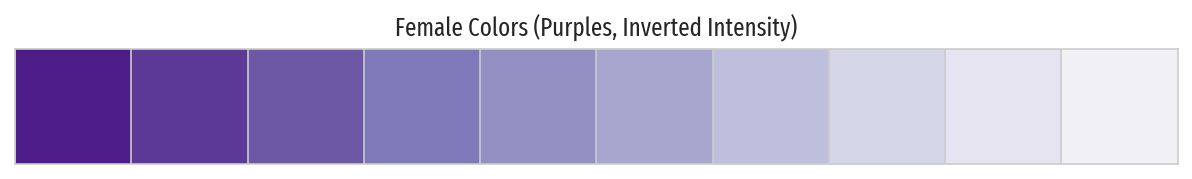

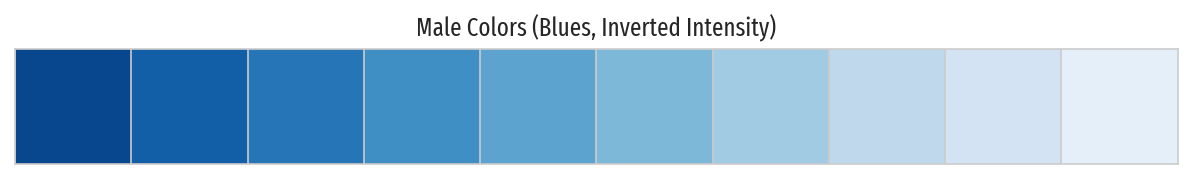

In [ ]:
# Visualizar la paleta de colores para mujeres
sns.palplot(female_colors)
plt.title("Female Colors (Purples, Inverted Intensity)")
plt.show()

# Visualizar la paleta de colores para hombres
sns.palplot(male_colors)
plt.title("Male Colors (Blues, Inverted Intensity)")
plt.show()

Visualizamos

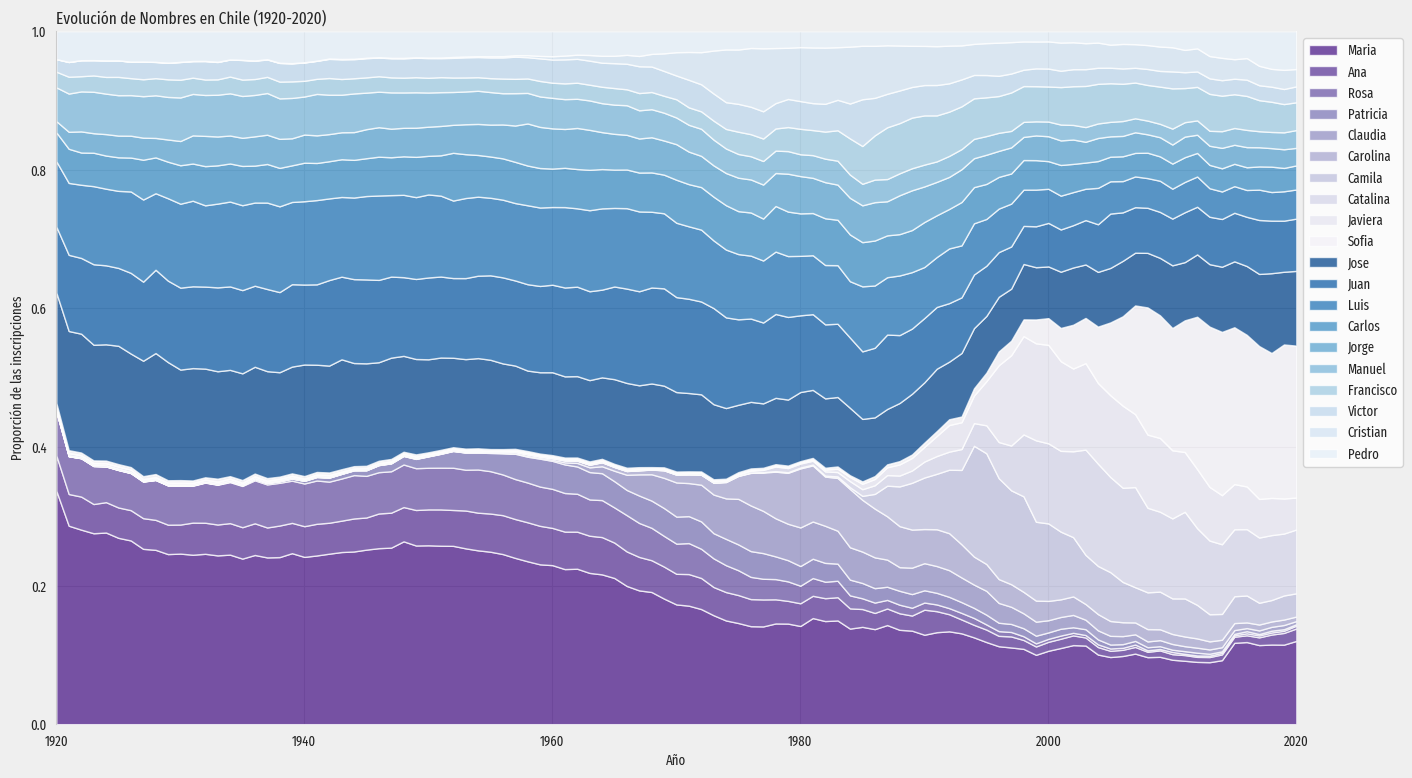

In [ ]:
# Paso 7: Crear el gráfico de áreas apiladas con colores diferenciados por sexo
fig, ax = plt.subplots(figsize=(16, 9), dpi=100)

# Establecer el color de fondo
fig.set_facecolor("#efefef")
ax.set_facecolor("#efefef")

# Configurar límites y etiquetas
ax.set_xlim([1920, 2020])
ax.set_ylim([0, 1])
ax.set_title("Evolución de Nombres en Chile (1920-2020)", loc="left")
ax.set_ylabel("Proporción de las inscripciones")
ax.set_xlabel("Año")

# Preparar datos para stackplot
stack_data = [tabla_anual_normalizada[nombre].values for nombre in tabla_anual_normalizada.columns]
stack_colors = [color_mapping[nombre] for nombre in tabla_anual_normalizada.columns]

# Graficar las áreas apiladas con stackplot
ax.stackplot(tabla_anual_normalizada.index, stack_data, labels=tabla_anual_normalizada.columns, colors=stack_colors, alpha=0.75)

# Añadir leyenda
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Eliminar las espinas del gráfico
sns.despine(ax=ax, bottom=True, top=True)

# Mostrar el gráfico
plt.show()

# Word Cloud

Un gráfico de nube de palabras, o "word cloud", es una representación visual de datos textuales en la que las palabras individuales se muestran con diferentes tamaños, colores y orientaciones. La principal característica de un word cloud es que el tamaño de cada palabra está relacionado con su frecuencia o importancia en el conjunto de datos: palabras que aparecen con mayor frecuencia en el texto de origen se muestran más grandes.

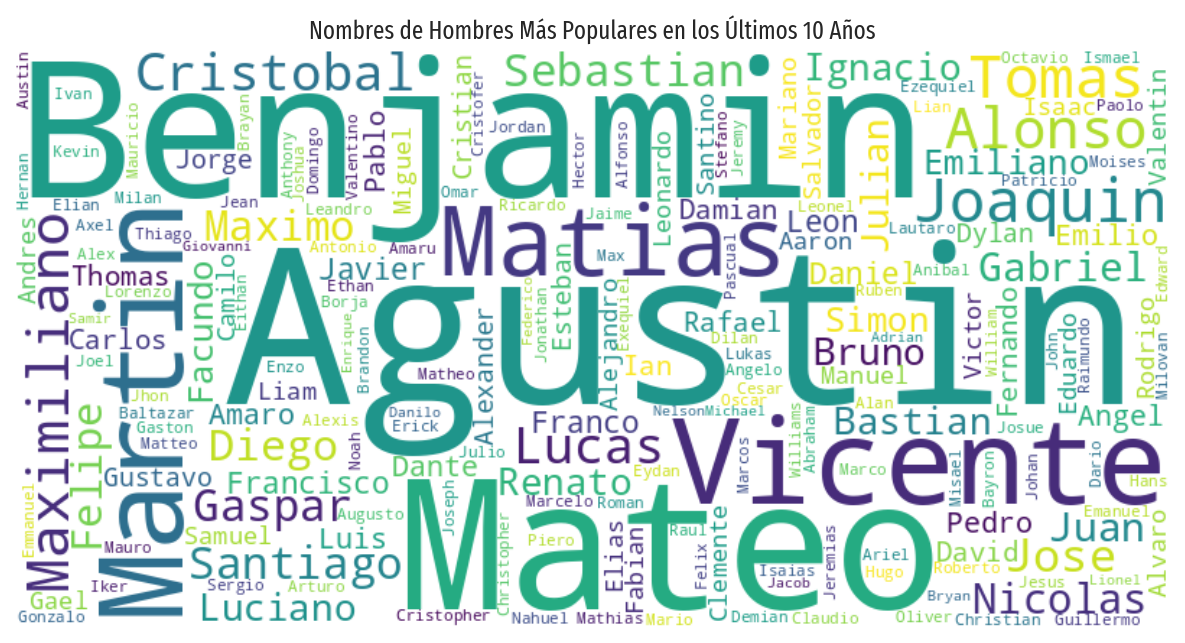

In [ ]:
from wordcloud import WordCloud

# Suponiendo que 'guaguas' es el DataFrame original con las columnas ['nombre', 'sexo', 'anio', 'n']

# Paso 1: Filtrar los datos para los últimos diez años
ultimo_anio = guaguas['anio'].max()
ultimos_diez_anios = guaguas[guaguas['anio'] >= (ultimo_anio - 9)]

# Paso 2: Filtrar los nombres de hombres
hombres_ultimos_diez_anios = ultimos_diez_anios[ultimos_diez_anios['sexo'] == 'M']

# Paso 3: Contar la frecuencia de los nombres
frecuencia_nombres_hombres = hombres_ultimos_diez_anios.groupby('nombre')['n'].sum().sort_values(ascending=False)

# Paso 4: Generar una nube de palabras con los nombres más frecuentes
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(frecuencia_nombres_hombres)

# Paso 5: Mostrar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Nombres de Hombres Más Populares en los Últimos 10 Años")
plt.show()


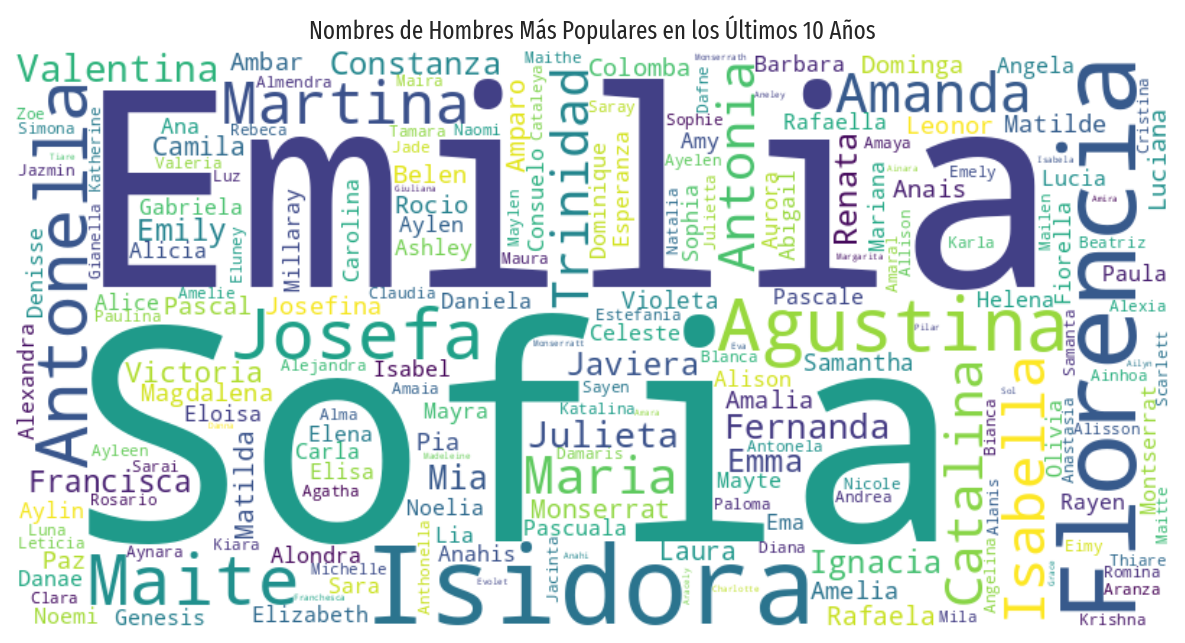

In [ ]:
from wordcloud import WordCloud

# Suponiendo que 'guaguas' es el DataFrame original con las columnas ['nombre', 'sexo', 'anio', 'n']

# Paso 1: Filtrar los datos para los últimos diez años
ultimo_anio = guaguas['anio'].max()
ultimos_diez_anios = guaguas[guaguas['anio'] >= (ultimo_anio - 9)]

# Paso 2: Filtrar los nombres de hombres
hombres_ultimos_diez_anios = ultimos_diez_anios[ultimos_diez_anios['sexo'] == 'F']

# Paso 3: Contar la frecuencia de los nombres
frecuencia_nombres_hombres = hombres_ultimos_diez_anios.groupby('nombre')['n'].sum().sort_values(ascending=False)

# Paso 4: Generar una nube de palabras con los nombres más frecuentes
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(frecuencia_nombres_hombres)

# Paso 5: Mostrar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Nombres de Hombres Más Populares en los Últimos 10 Años")
plt.show()

# Bubble Plots

In [ ]:
# Crear una tabla pivote
tabla_pivote = pd.pivot_table(guaguas, index="nombre", columns="sexo", values="n", aggfunc="sum")

# Unir con total_n y rellenar NaN con 0
tabla_completa = tabla_pivote.join(total_n).fillna(0)


tabla_completa

,F,M,n
nombre,,,
'Akurenga,0.0,1.0,1
'Amakihi,1.0,0.0,1
'Annia,1.0,0.0,1
'Ihan,0.0,1.0,1
'Ohana,1.0,0.0,1
...,...,...,...
Zyra,2.0,0.0,2
Zyrack,0.0,1.0,1
Zyrce,1.0,0.0,1


In [ ]:
# Calcular la multiplicación de F y M y filtrar nombres unisex
tabla_completa["mult"] = tabla_completa["F"] * tabla_completa["M"]
tabla_completa

,F,M,n,mult
nombre,,,,
'Akurenga,0.0,1.0,1,0.0
'Amakihi,1.0,0.0,1,0.0
'Annia,1.0,0.0,1,0.0
'Ihan,0.0,1.0,1,0.0
'Ohana,1.0,0.0,1,0.0
...,...,...,...,...
Zyra,2.0,0.0,2,0.0
Zyrack,0.0,1.0,1,0.0
Zyrce,1.0,0.0,1,0.0


In [ ]:
unisex_names = tabla_completa[(tabla_completa["mult"] > 0) & (tabla_completa["n"] > 50)]
unisex_names

,F,M,n,mult
nombre,,,,
Aaron,1.0,8607.0,8608,8607.0
Abby,439.0,3.0,442,1317.0
Abdel,1.0,88.0,89,88.0
Abdias,1.0,308.0,309,308.0
Abdiel,1.0,821.0,822,821.0
...,...,...,...,...
Zi,34.0,37.0,71,1258.0
Zoe,1329.0,15.0,1344,19935.0
Zoilo,1.0,503.0,504,503.0


In [ ]:
# Eliminar columnas innecesarias y normalizar las filas
unisex_names = unisex_names.drop(["mult","n"], axis=1)
unisex_names = normalize_rows(unisex_names)

unisex_names

,F,M
nombre,,
Aaron,0.000116,0.999884
Abby,0.993213,0.006787
Abdel,0.011236,0.988764
Abdias,0.003236,0.996764
Abdiel,0.001217,0.998783
...,...,...
Zi,0.478873,0.521127
Zoe,0.988839,0.011161
Zoilo,0.001984,0.998016


In [ ]:
# Filtrar nombres unisex con proporción de F entre 0.02 y 0.98
unisex_names = unisex_names[unisex_names["F"].between(0.02, 0.98)]

# Uno la columna n de nuevo
unisex_names = unisex_names.join(total_n)

# Ordenar y mostrar los 15 nombres unisex más comunes
unisex_names = unisex_names.sort_values('n', ascending=False)

# Mostrar el resultado
unisex_names

,F,M,n
nombre,,,
Jesus,0.046455,0.953545,18534
Rosario,0.962169,0.037831,14142
Carol,0.978415,0.021585,11119
Pascal,0.959082,0.040918,8456
Karin,0.979934,0.020066,7874
...,...,...,...
Mily,0.960784,0.039216,51
Ain,0.607843,0.392157,51
Anwar,0.058824,0.941176,51


<Axes: ylabel='Frequency'>

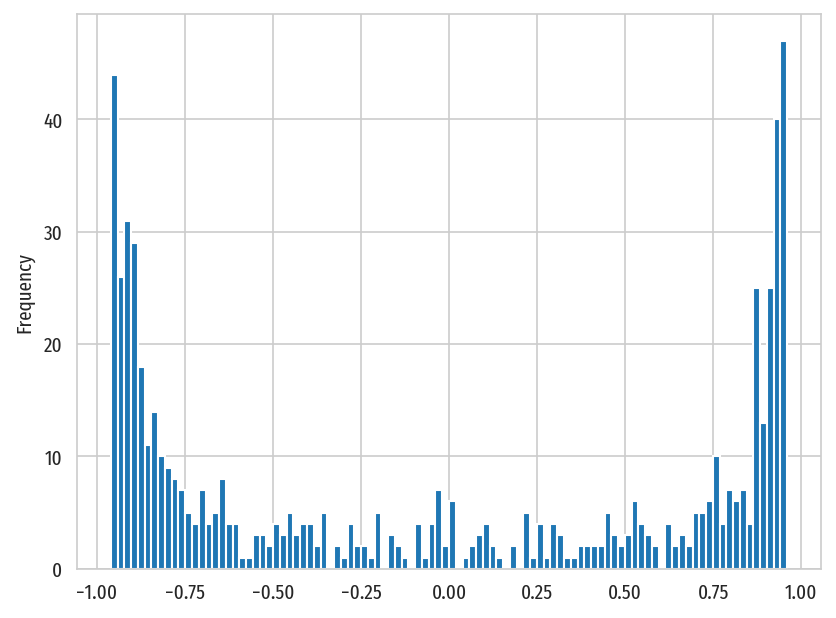

In [ ]:
unisex_names["tendency"] = unisex_names["F"] - unisex_names["M"]
unisex_names["tendency"].plot(kind="hist", bins=100)


In [ ]:
!pip3 install KDEpy
!pip3 install contextily

In [ ]:
!pip install pymunk

In [ ]:
from miniaves import bubble_plot

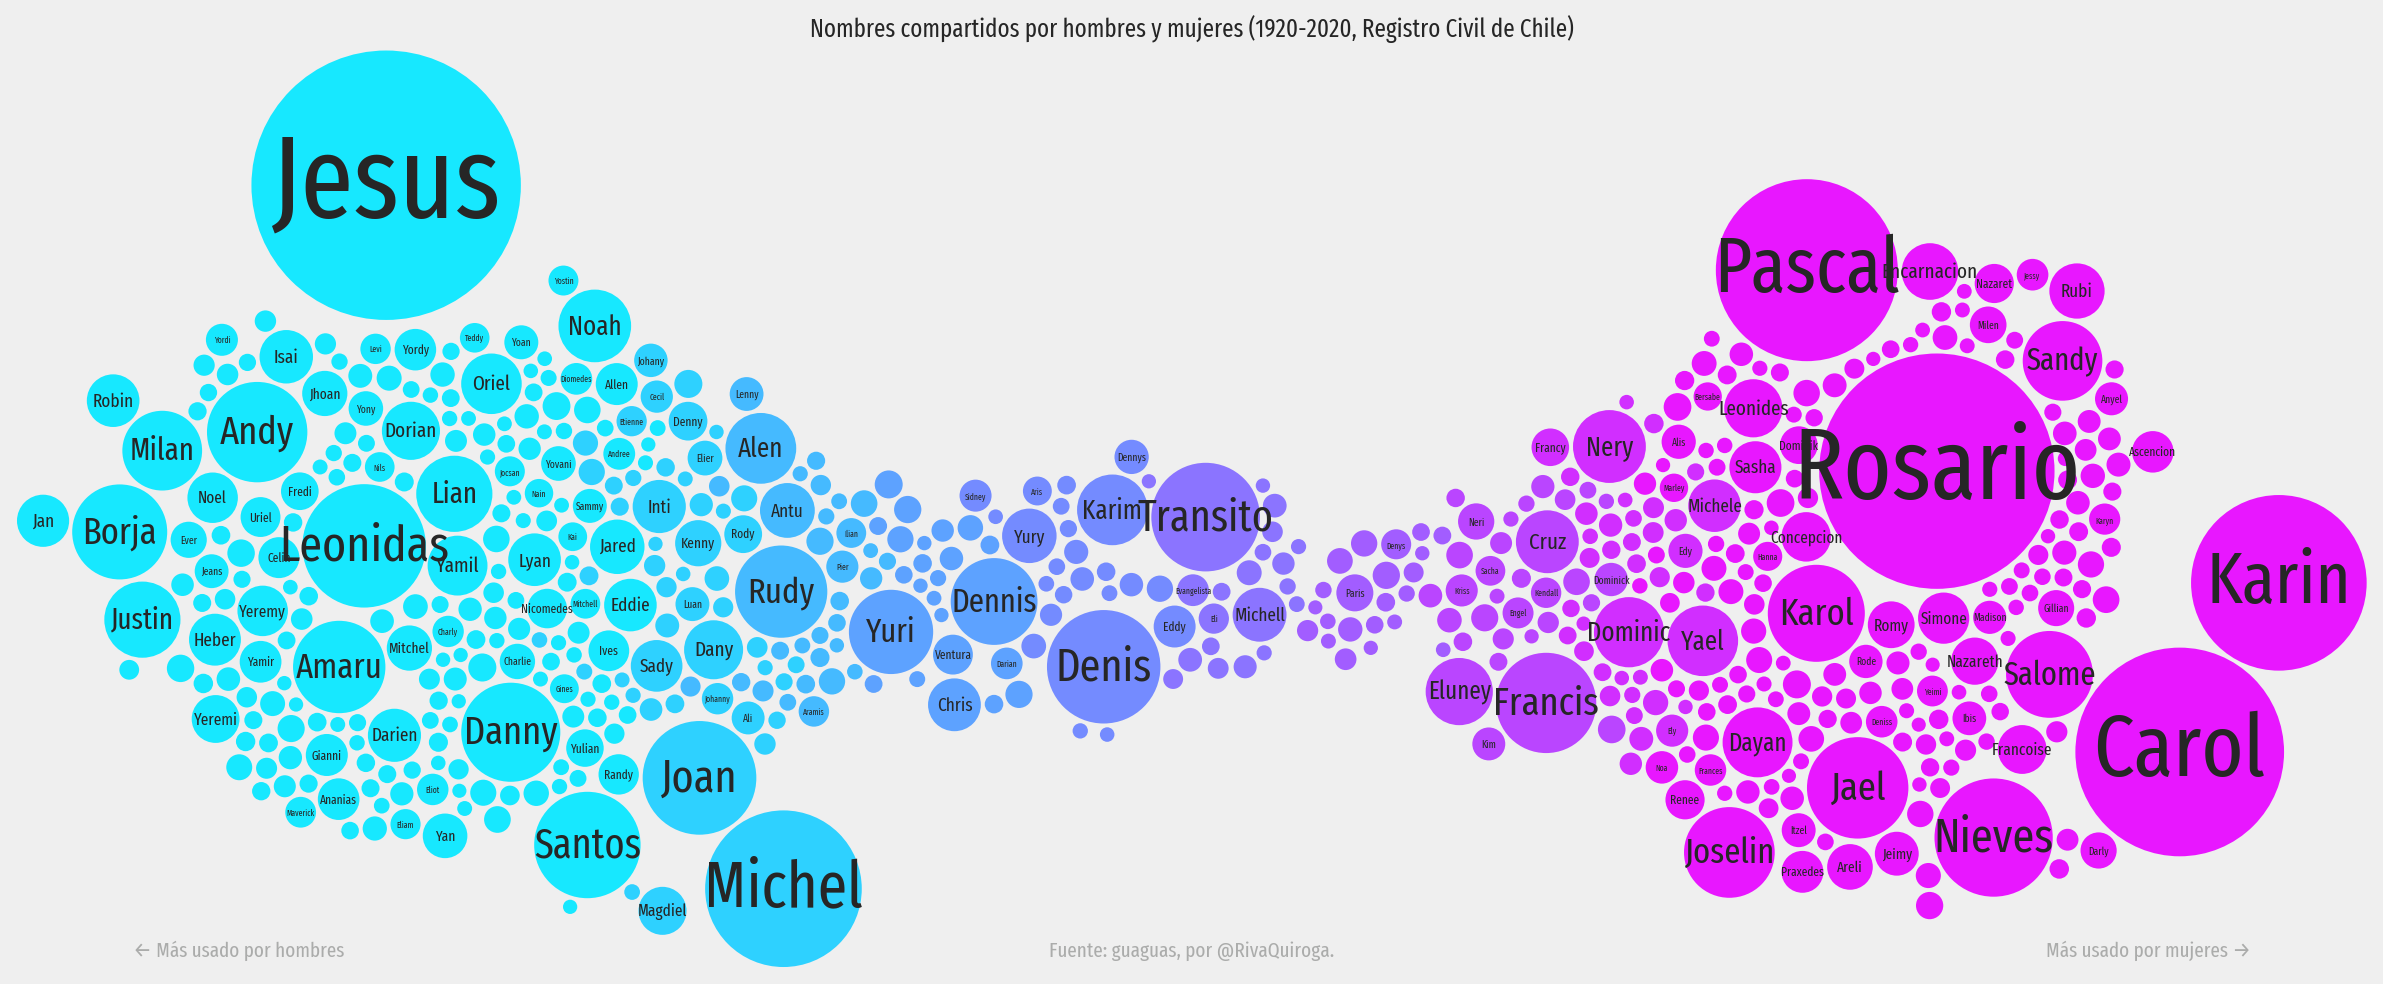

In [ ]:
fig, ax = plt.subplots(figsize=(16, 9))

bubble_plot(ax,unisex_names.reset_index(),"tendency","n",label_column="nombre",palette="cool",max_label_size=56,starting_y_range=60, margin=2)

ax.set_axis_off()
ax.set_title("Nombres compartidos por hombres y mujeres (1920-2020, Registro Civil de Chile)")

ax.annotate("Más usado por mujeres →",(0.95, 0.01), xycoords="axes fraction",ha="right", va="bottom",fontsize="medium",color="#abacab")

ax.annotate("← Más usado por hombres",(0.05, 0.01), xycoords="axes fraction",ha="left",va="bottom",fontsize="medium",color="#abacab")
ax.annotate("Fuente: guaguas, por @RivaQuiroga.",(0.5, 0.01),xycoords="axes fraction",ha="center",va="bottom",fontsize="medium",color="#abacab")

fig.set_facecolor("#efefef")
fig.tight_layout()
